In [72]:
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [73]:
df=pd.read_csv("C:/Users/saisi/Downloads/archive (3).zip")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [75]:
print(f'''number of rows: {df.shape[0]}
      number of columns:{df.shape[1]}''')

number of rows: 200
      number of columns:4


In [76]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'correlation among the variables')

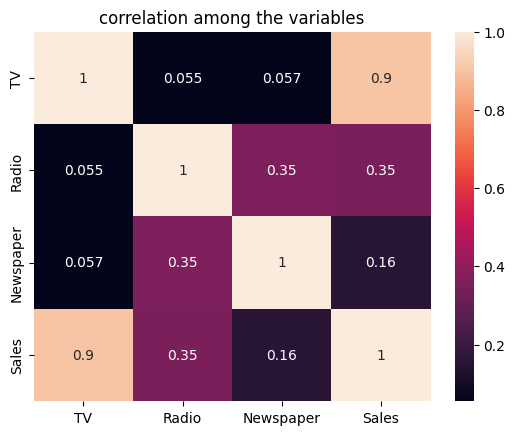

In [77]:
sns.heatmap(df.corr(),annot=True,fmt='.2g')
plt.title('correlation among the variables')

c:\Users\saisi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saisi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saisi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'values')

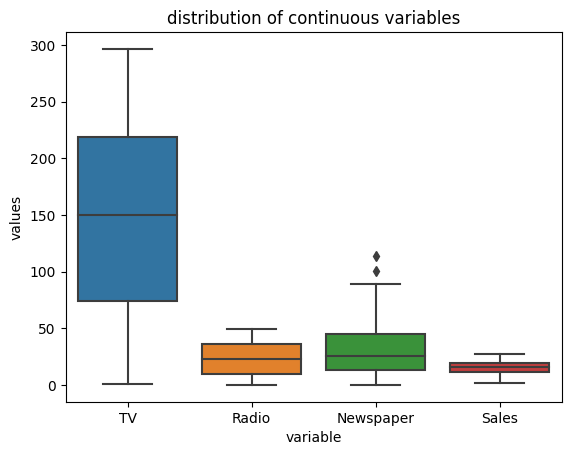

In [78]:
sns.boxplot(df.melt(value_vars=df.columns),x='variable',y='value')
plt.title('distribution of continuous variables')
plt.xlabel('variable')
plt.ylabel('values')

In [79]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=102)
print(f'''x train:{x_train.shape}
      x test:{x_test.shape}
      y train:{y_train.shape}
      y test:{y_test.shape}''')

x train:(160, 3)
      x test:(40, 3)
      y train:(160,)
      y test:(40,)


In [81]:
preprocess=Pipeline([
    ('scaler',StandardScaler())
])

model=Pipeline([
    ('preprocess',preprocess),
    ('regressor',RandomForestRegressor())
])

model.fit(x_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [82]:
y_pred=model.predict(x_test)
print(f'Testing Accuracy:{round(100*r2_score(y_test,y_pred))}%')

Testing Accuracy:93%
